In [1]:
 !pip install pyro-ppl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 12.8 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import pyro
import pyro.distributions as dist
import random

1-Consider distribution of any type and draw random number of samples

In [3]:
def Poisson_dist(start,end,rate,num_samples):
  sample_list=[]
  i=0
  while(i<num_samples):
    k=pyro.sample("poission_sample",dist.Poisson(rate))
    if(k in sample_list):
      continue
    else:
      sample_list.append(k)
      i=i+1
  return sample_list


In [4]:
#main function
n=int(input("Enter the number of samples:"))
start=int(input("From:"))
end=int(input("To:"))
rate=float(input("Enter the rate parameter value:"))
sample=Poisson_dist(start,end,rate,n)
print("Samples")
for i in range(len(sample)):
  print(sample[i])

Enter the number of samples:10
From:0
To:25
Enter the rate parameter value:12
Samples
tensor(10.)
tensor(12.)
tensor(11.)
tensor(15.)
tensor(13.)
tensor(8.)
tensor(9.)
tensor(14.)
tensor(4.)
tensor(7.)


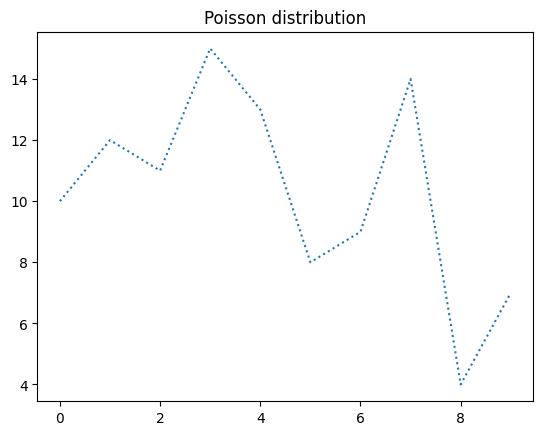

In [7]:
plt.plot(sample, linestyle = 'dotted')
plt.title("Poisson distribution")
plt.show()

2-forecasting model

In [20]:
import pyro.distributions as dist
temp_list=[]
def weather():
    rainy = pyro.sample('rainy', dist.Bernoulli(0.4))
    rainy = 'rainy' if rainy.item() == 1.0 else 'sunny'
    mean_temp = {'rainy': 55.0, 'sunny': 75.0}[rainy]
    scale_temp = {'rainy': 10.0, 'sunny': 15.0}[rainy]
    temp = pyro.sample('temp', dist.Laplace(mean_temp, scale_temp))
    temp_list.append(temp)
    return rainy, temp.item()
for _ in range(6):
    print(weather())

('rainy', 54.82550811767578)
('rainy', 52.3857421875)
('rainy', 38.07648849487305)
('sunny', 77.4388198852539)
('sunny', 79.0822525024414)
('sunny', 79.16091918945312)


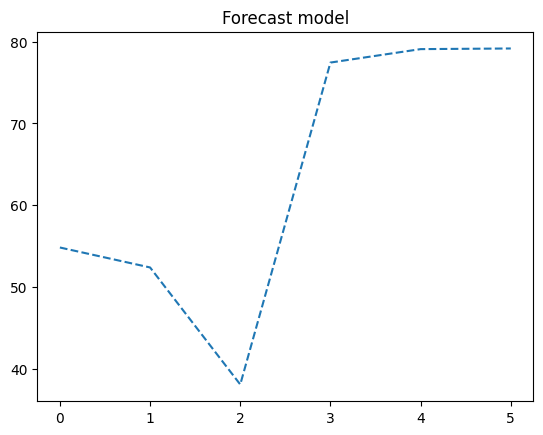

In [21]:
plt.plot(temp_list, linestyle = 'dashed')
plt.title("Forecast model")
plt.show()